In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')

#Style
sns.set_palette("deep", 8)


# Drop whats unecessary
data = data.drop(columns=['Cabin', 'Ticket'])
test_data = test_data.drop(columns=['Cabin', 'Ticket'])


# ----------------------
# Add feature FamilySize
# ----------------------
data['FamilySize'] = [x + y for x, y in zip(data['Parch'], data['SibSp'])]
test_data['FamilySize'] = [x + y for x, y in zip(test_data['Parch'], test_data['SibSp'])]


# Categorize
def family_size_category(size):
    if size >= 5: return 3
    elif 3 <= size < 5: return 2
    elif 1 <= size < 3: return 1
    else: return 0

data["FamilySize"] = data['FamilySize'].map(family_size_category)
test_data["FamilySize"] = test_data['FamilySize'].map(family_size_category)


# ---------------------
# Convert Sex to binary
# ---------------------
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)


# ------------------
# Deal with Embarked
# ------------------
# Fill Nan - Embarked
# Find most frequent category in column (mode()[0]) an fill NaN with it
embarked_freq = data['Embarked'].dropna().mode()[0]
data['Embarked'] = data['Embarked'].fillna(embarked_freq)

# Convert to numeric
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)


# --------------------
# Get titles from Name
# --------------------
# Use .extract(REGEX) to extract titles only
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


for i, row in data.iterrows():
    if (row['Title'] not in ["Mr", "Miss", "Mrs", "Master"]):    
        data['Title'][i] = "Other"

for i, row in test_data.iterrows():
    if (row['Title'] not in ["Mr", "Miss", "Mrs", "Master"]):    
        test_data['Title'][i] = "Other"

# Convert to int 
data['Title'] = data['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}).astype(int)
test_data['Title'] = test_data['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}).astype(int)


# ---------------
# Fare Categories
# ---------------
# Fill missing fare on test data
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

# Apply categories with labels
data['FareCategory'] = pd.qcut(data['Fare'], 4, labels=[0,1,2,3]).astype(int)
test_data['FareCategory'] = pd.qcut(test_data['Fare'], 4, labels=[0,1,2,3]).astype(int)


# --------
# Clean up
# --------
# Save PassengerId for later
passenger_id = test_data['PassengerId']

# Drop whats unecessary
data = data.drop(columns=['SibSp', 'Parch', 'PassengerId', 'Fare', 'Name'])
test_data = test_data.drop(columns=['SibSp', 'Parch', 'PassengerId', 'Fare', 'Name'])


# --------------------------------------------------------
# Deal with Age NaN and divide into categories (Train set)
# --------------------------------------------------------
#Replace NaN with mean for Age
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Select training data
XClean = data.dropna(axis=0, how='any')
X = XClean[['Title', 'Pclass', 'FareCategory', 'Embarked']]
y = data[['Age']].dropna()

# Select test data (rows missing Age) 
XTestClean = data.loc[pd.isnull(data[['Age']]).any(axis=1)]
XTest = XTestClean[['Title', 'Pclass', 'FareCategory', 'Embarked']]
yToFill = XTestClean[['Age']]

# Fit and predict
linreg = LinearRegression()
linreg.fit(X, y)

# predict
yPred = linreg.predict(XTest).flatten().tolist()

# Replace NaN with predicted Age values
yToFill['Age'] = yPred
data['Age'] = data.combine_first(yToFill)

# Categorize
def age_category(age):
    if age >= 60: return 4
    elif 21 <= age < 60: return 3
    elif 12 <= age < 21: return 2
    elif 3 <= age < 12: return 1
    else: return 0
    
data["Age"] = data['Age'].map(age_category)

# -------------------------------------------------------
# Deal with Age NaN and divide into categories (Test set)
# -------------------------------------------------------
# Select data (rows missing Age) 
XTestClean = test_data.loc[pd.isnull(test_data[['Age']]).any(axis=1)]
XTest = XTestClean[['Title', 'Pclass', 'FareCategory', 'Embarked']]
test_yToFill = XTestClean[['Age']]

# predict
yPred = linreg.predict(XTest).flatten().tolist()

# Replace NaN with predicted Age values
test_yToFill['Age'] = yPred
test_data['Age'] = test_data.combine_first(test_yToFill)

# Categorize
test_data["Age"] = test_data['Age'].map(age_category)

# ----------------------
data.head()

c:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:151: Setting

,Survived,Pclass,Sex,Age,Embarked,FamilySize,Title,FareCategory
0,0,3,0,3,2,1,0,0
1,1,1,1,3,0,1,2,3
2,1,3,1,3,2,0,1,1
3,1,1,1,3,2,1,2,3
4,0,3,0,3,2,0,0,1


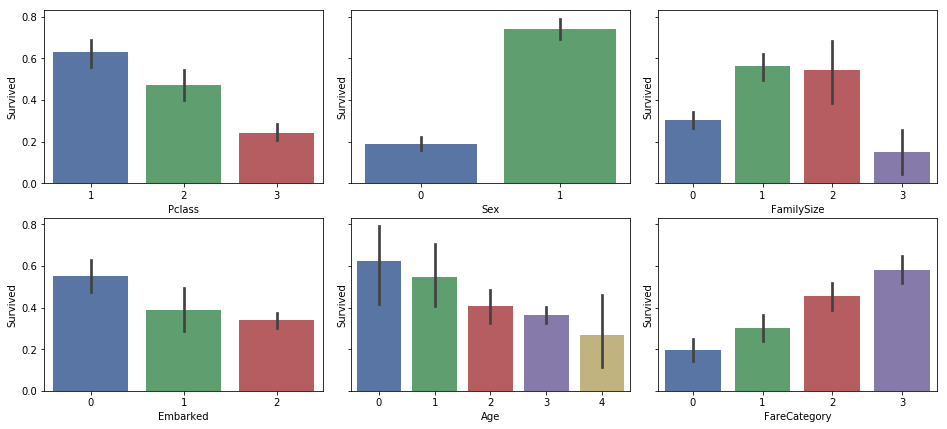

In [2]:
#Create figure & adjust
fig, (ax1, ax2) = plt.subplots(2, 3, gridspec_kw={'height_ratios':[1,1]}, figsize=(16,7), sharey=True)
fig.subplots_adjust(wspace=0.1)

#Plot
sns.barplot(x="Pclass", y="Survived", data=data, ax=ax1[0])
sns.barplot(x="Sex", y="Survived", data=data, ax=ax1[1])
sns.barplot(x="FamilySize", y="Survived", data=data, ax=ax1[2])
sns.barplot(x="Embarked", y="Survived", data=data, ax=ax2[0])
sns.barplot(x="Age", y="Survived", data=data, ax=ax2[1])
sns.barplot(x="FareCategory", y="Survived", data=data, ax=ax2[2])

In [87]:
# Index data
# ----------
X = data[['Sex', 'Pclass', 'FamilySize', 'FareCategory', 'Embarked', 'Title', 'Age']]
y = data['Survived']
X_test = test_data[['Sex', 'Pclass', 'FamilySize', 'FareCategory', 'Embarked', 'Title', 'Age']]

# Create dummy variables for categorical variables and delete one to avoid trap
# -----------------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_d = pd.get_dummies(X, columns=['Embarked', 'Title'], drop_first=True)
X_test_d = pd.get_dummies(X_test, columns=['Embarked', 'Title'], drop_first=True)

In [88]:
# Feature Selection
# -----------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from collections import Counter
import operator

number = []
features = []
for x in range(15):
    clf_rf_4 = RandomForestClassifier() 
    rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='accuracy')
    rfecv = rfecv.fit(X_d, y)
    number.append(rfecv.n_features_)
    features.append(list(X_d.columns[rfecv.support_]))

print('Optimal number of features :', np.mean(number))

best_features = dict(Counter([item for sublist in features for item in sublist]))
print('Best features :', sorted(best_features.items(), key=operator.itemgetter(1)))

Optimal number of features : 6.2
Best features : [('Embarked_1', 2), ('Title_3', 2), ('Embarked_2', 4), ('Title_1', 8), ('Title_2', 8), ('FamilySize', 11), ('FareCategory', 13), ('Sex', 15), ('Pclass', 15), ('Age', 15)]


In [89]:
# Feature Selection
# -----------------
X_dc = X_d[['Sex', 'Pclass', 'FamilySize', 'FareCategory', 'Title_1', 'Title_2', 'Age', 'Embarked_2']]
X_test_dc = X_test_d[['Sex', 'Pclass', 'FamilySize', 'FareCategory', 'Title_1', 'Title_2', 'Age', 'Embarked_2']]

In [90]:
# Feature Scaling 
# ---------------
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_dcs = sc_X.fit_transform(X_dcs)
X_test_dcs = sc_X.transform(X_test_dcs)

In [68]:
# Kernel PCA
# ----------
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel='rbf')

X_dcss = kpca.fit_transform(X_dcs)
X_test_dcss = kpca.transform(X_test_dcs)

In [78]:
# LDA
# ---
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=5)

X_dcss = lda.fit_transform(X_dcs, y)
X_test_dcss = lda.transform(X_test_dcs)

# Classify

## KNN

0.8249747587317765


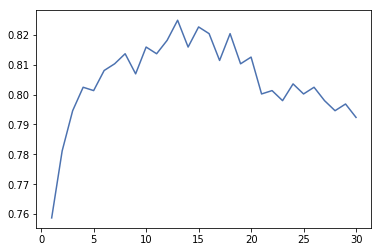

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kRange = list(range(1,31))
param_grid = dict(n_neighbors=kRange)

# Instantiate grid
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit data
grid.fit(X_dcs, y)
grid.cv_results_

# Plot
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(kRange, grid_mean_scores)

from sklearn.model_selection import cross_val_score
cvs = cross_val_score(KNeighborsClassifier(n_neighbors=13), X_dcs, y, cv=5, scoring='accuracy')
print(cvs.mean())

In [94]:
knn = KNeighborsClassifier(n_neighbors=13)
svc.fit(X_dcss, y)
y_pred = svc.predict(X_test_dcss)

## SVM

In [106]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': np.arange(0.5,1.5, 0.05).tolist(),
              'gamma': np.arange( 0.0, 0.5, 0.05).tolist()}

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=6)
grid_search = grid_search.fit(X_dcss, y)

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search)

0.8361391694725028
{'C': 0.5, 'gamma': 0.25}
GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=6,
       param_grid={'C': [0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000002, 0.7500000000000002, 0.8000000000000003, 0.8500000000000003, 0.9000000000000004, 0.9500000000000004, 1.0000000000000004, 1.0500000000000005, 1.1000000000000005, 1.1500000000000006, 1.2000000000000006, 1.250000000....0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)


In [100]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(SVC(C=.5, gamma=0.25), X_dcss, y, cv=5, scoring='accuracy')
cvs.mean()

0.836166845226253

In [103]:
# Fit and Predict final model
svc = SVC(C=0.5, gamma=0.25)
svc.fit(X_d, y)
y_pred = svc.predict(X_test_d)

In [104]:
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [107]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'PassengerId': passenger_id,
                                    'Survived': y_pred })
StackingSubmission.to_csv("Submission.csv", index=False)